# **Haberman's Survival Data**

Dataset:https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1


*  A Dataset taken  to perform Assignment
*  Survival Status of patients who had undergone surgery for breast cancer.
*   On 1999 by Tjen-Sien Lim
*   To understand Axillary Nodes please go through the website :[https://jamanetwork.com/journals/jama/fullarticle/1750133]
*   Objective:To explore the Data and perform various Plots based on Survival Status



In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#downlaod haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1
#Loading haberman.csv into a pandas dataFrame.
Haberman = pd.read_csv("haberman.csv")

In [4]:
#count of (Rows and Columns) or(Data-points & Features) 
print(Haberman.shape)

(305, 4)


**Observation-1**: 

Dataset contains 306 Data points and 4 features.

In [5]:
#Printing first 5 Rows and the column names
print (Haberman.columns)
Haberman.head()

Index(['30', '64', '1', '1.1'], dtype='object')


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**Observation-2**:
The column names are not defined in a good user understanding way.

In [6]:
#Renaming the Column names:
Haberman.columns = ['Age','Op_year','Axil_nodes','Survival_status']
#Printing first 5 Rows and the column names
print (Haberman.columns)
Haberman.head()

Index(['Age', 'Op_year', 'Axil_nodes', 'Survival_status'], dtype='object')


,Age,Op_year,Axil_nodes,Survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**Observation-3**:

Age: Age of patient at time of operation (numerical)


Op_year: Patient's year of operation (year - 1900, numerical)

Axil_nodes: Number of positive axillary nodes detected (numerical)

Survival_status =1 If  Patient survived 5 years or longer.
Survival_status =2 If Patient died within 5 year

In [7]:
#Survival count

Haberman["Survival_status"].value_counts()


1    224
2     81
Name: Survival_status, dtype: int64

**Observation-4**:It is a Unbalanced datset with

225 people survived more than 5 years

81 people couldn't survive more than 5 years.

# 2-D Plot Scatter Plot

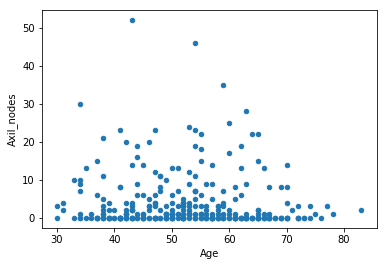

In [8]:
Haberman.plot(kind='scatter', x='Age', y='Axil_nodes');
plt.show()     
#Plotting the Survival status with respective to A.nodes count

**Observation-5**:

Most of the people have Zero  nodes or less than 5 nodes

# 2-D Plot Scatter Plot with Colour-coding

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


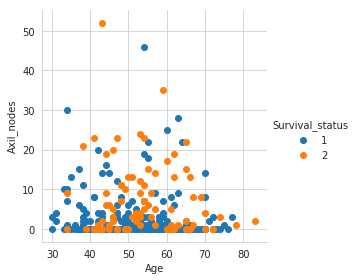

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue="Survival_status", size=4) \
   .map(plt.scatter,"Age", "Axil_nodes") \
   .add_legend();
plt.show();

Observation:

People with zero node cannot be distinguished w.r.t survival_status

# Pair-Plot

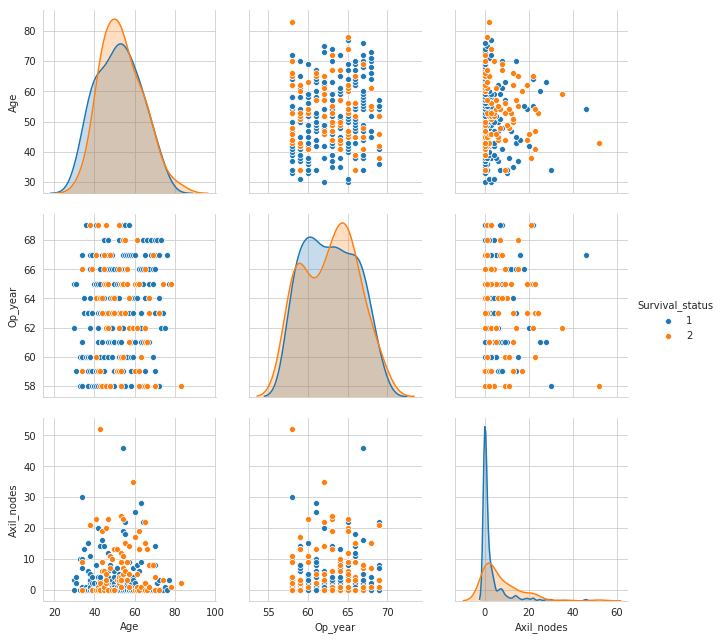

In [10]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(Haberman, hue='Survival_status' ,vars = ['Age', 'Op_year', 'Axil_nodes'], height = 3)
plt.show()

# Histogram, PDF, CDF

Histogram:


*   
A histogram is a plot that lets you discover, and show, the underlying frequency distribution  of a set of continuous data.
*   To construct a histogram from a continuous variable you first need to split the data into intervals, called bins
*  The width of each bin is calculated as = ((max - min) / bins)
*  There is no right or wrong answer as to how wide a bin should be, but there are rules of thumb. You need to make sure that the bins are not too small or too large
*   To find the counts we calcuate how many number of points fall into each bin
*   List item







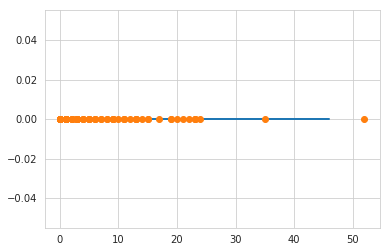

In [11]:
#plotting 1D plot
#Survival_status vs nodes
Status_Survive = Haberman.loc[Haberman["Survival_status"] == 1];
Status_Dead = Haberman.loc[Haberman["Survival_status"] == 2];
plt.plot(Status_Survive["Axil_nodes"],np.zeros_like(Status_Survive["Axil_nodes"]))
plt.plot(Status_Dead["Axil_nodes"],np.zeros_like(Status_Dead["Axil_nodes"]), 'o')
plt.show()

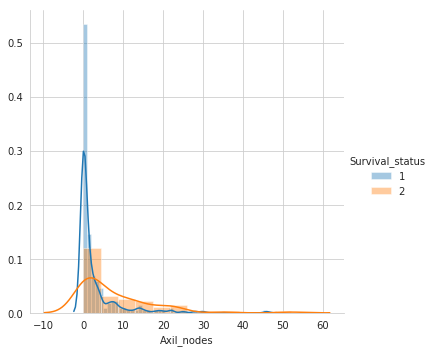

In [12]:
#Plotting Survival_status ns Axil_nodes
#Histogram with default bin size value using sns.distplot

sns.FacetGrid(Haberman, hue="Survival_status", height=5) \
   .map(sns.distplot, "Axil_nodes") \
   .add_legend();
plt.show();


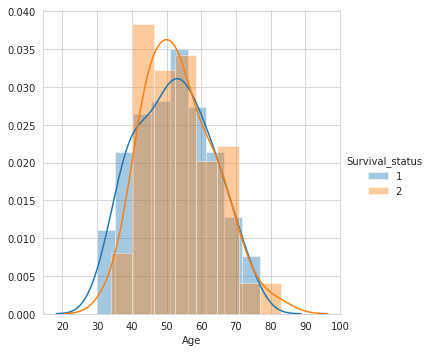

In [13]:
#Plotting Survival_status vs age
#Histogram with default bin size value using sns.distplot
sns.FacetGrid(Haberman, hue="Survival_status", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

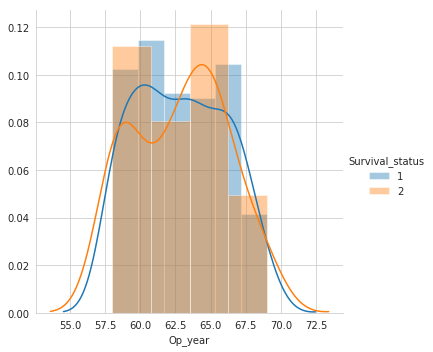

In [32]:
#Survival_status vs year
#Histogram with default bin size value using sns.distplot
sns.FacetGrid(Haberman, hue="Survival_status", height=5) \
   .map(sns.distplot, "Op_year") \
   .add_legend();
plt.show();


[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


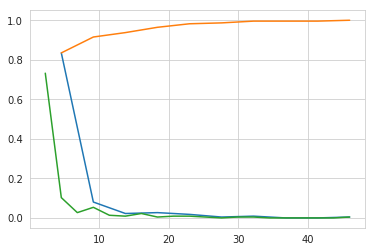

In [27]:
counts, bin_edges = np.histogram(Status_Survive['Axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(Status_Survive['Axil_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


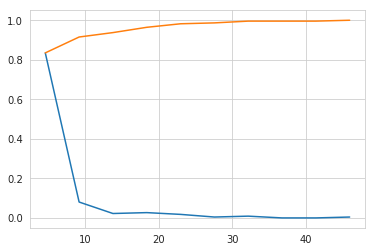

In [16]:
counts, bin_edges = np.histogram(Status_Survive['Axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


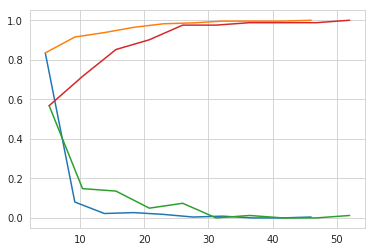

In [17]:
counts, bin_edges = np.histogram(Status_Survive['Axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(Status_Dead['Axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

# Mean, Variance and Std-dev

In [18]:
print("Means:")
print(np.mean(Status_Survive['Axil_nodes']))
#Mean with an outlier.
print(np.mean(np.append(Status_Survive['Axil_nodes'],50)));
print(np.mean(Status_Dead['Axil_nodes']))

print("\nStd-dev:");
print(np.std(Status_Survive['Axil_nodes']))
print(np.std(Status_Dead['Axil_nodes']))

Means:
2.799107142857143
3.008888888888889
7.45679012345679

Std-dev:
5.869092706952767
9.128776076761632


# Median, Percentile, Quantile, IQR, MAD

In [19]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(Status_Survive['Axil_nodes']))
#Median with an outlier
print(np.median(np.append(Status_Survive['Axil_nodes'],50)));
print(np.median(Status_Dead['Axil_nodes']))


print("\nQuantiles:")
print(np.percentile(Status_Survive['Axil_nodes'],np.arange(0, 100, 25)))
print(np.percentile(Status_Dead['Axil_nodes'],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(Status_Survive['Axil_nodes'],90))
print(np.percentile(Status_Dead['Axil_nodes'],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Status_Survive['Axil_nodes']))
print(robust.mad(Status_Dead['Axil_nodes']))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# Box plot and Whiskers

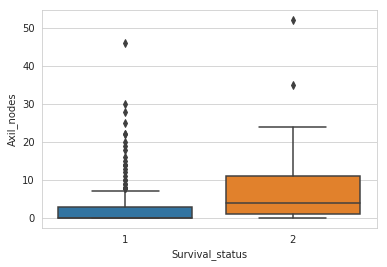

In [20]:
sns.boxplot(x='Survival_status',y='Axil_nodes', data=Haberman)
plt.show()

# Violin plots

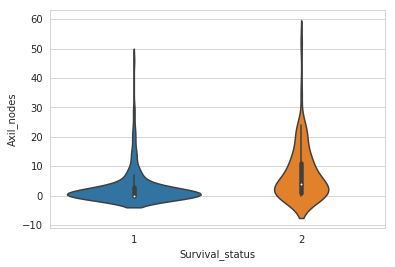

In [21]:
sns.violinplot(x='Survival_status',y='Axil_nodes', data=Haberman, size=8)
plt.show()

# Multivariate probability density, contour plot

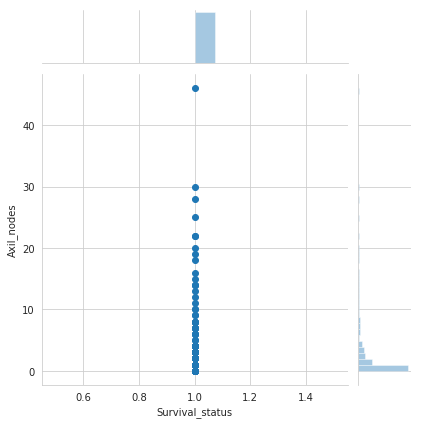

In [22]:
sns.jointplot(x='Survival_status',y='Axil_nodes', data=Status_Survive);
plt.show();